In [1]:
import numpy as np
import networkx as nx


In [2]:
from graphs import make_C_N, make_A_N, preserves_structure, follow_endomap

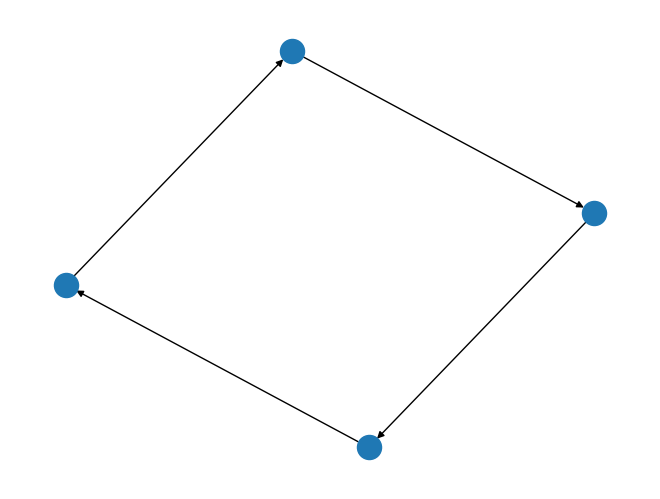

In [3]:
# let's start with the example from Session 15 first
XG = make_C_N(4)
nx.draw(XG)

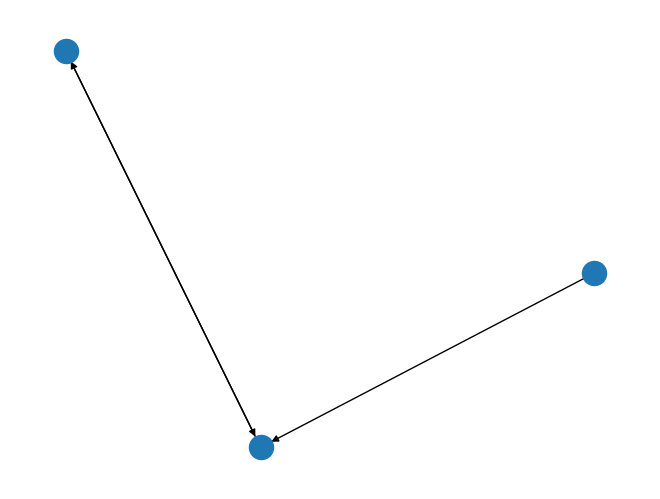

In [4]:
YG = nx.DiGraph({'y':['z'],'z':['y'],'w':['z']})
nx.draw(YG)

In [5]:
def count_maps_in_S(GA,GB,fixed=None):
    if fixed is None:
        return len(GB)**len(GA)
    node_set = set(GA.nodes)-set(fixed.keys())
    a_count = len(node_set)
    return len(GB)**a_count

In [6]:
count_maps_in_S(XG,YG)

81

In [7]:
count_maps_in_S(XG,YG,fixed={0:'y'})

27

In [8]:
def make_map_in_S_by_index(n,GA,GB,fixed=None):
    if fixed is None:
        fixed = {}
    domain = set(GA.nodes)-set(fixed.keys())
    domain_size = len(domain)
    codomain_size = len(GB)
    map_count = codomain_size**domain_size
    assert n >= 0 and n < map_count
    assignments = []
    idx = 0
    cur = n
    while idx < domain_size:
        d = cur%codomain_size
        assignments.append(d)
        cur = int((cur-d)/codomain_size)
        idx += 1
    lA,lB = list(domain),list(GB.nodes)
    output = {
        lA[i]:lB[a] for i,a in enumerate(assignments)
    }
    for k,v in zip(fixed.keys(),fixed.values()):
        output[k] = v
    return output

for i in range(27): 
    print(make_map_in_S_by_index(i,XG,YG,fixed={0:'y'}))

{1: 'y', 2: 'y', 3: 'y', 0: 'y'}
{1: 'z', 2: 'y', 3: 'y', 0: 'y'}
{1: 'w', 2: 'y', 3: 'y', 0: 'y'}
{1: 'y', 2: 'z', 3: 'y', 0: 'y'}
{1: 'z', 2: 'z', 3: 'y', 0: 'y'}
{1: 'w', 2: 'z', 3: 'y', 0: 'y'}
{1: 'y', 2: 'w', 3: 'y', 0: 'y'}
{1: 'z', 2: 'w', 3: 'y', 0: 'y'}
{1: 'w', 2: 'w', 3: 'y', 0: 'y'}
{1: 'y', 2: 'y', 3: 'z', 0: 'y'}
{1: 'z', 2: 'y', 3: 'z', 0: 'y'}
{1: 'w', 2: 'y', 3: 'z', 0: 'y'}
{1: 'y', 2: 'z', 3: 'z', 0: 'y'}
{1: 'z', 2: 'z', 3: 'z', 0: 'y'}
{1: 'w', 2: 'z', 3: 'z', 0: 'y'}
{1: 'y', 2: 'w', 3: 'z', 0: 'y'}
{1: 'z', 2: 'w', 3: 'z', 0: 'y'}
{1: 'w', 2: 'w', 3: 'z', 0: 'y'}
{1: 'y', 2: 'y', 3: 'w', 0: 'y'}
{1: 'z', 2: 'y', 3: 'w', 0: 'y'}
{1: 'w', 2: 'y', 3: 'w', 0: 'y'}
{1: 'y', 2: 'z', 3: 'w', 0: 'y'}
{1: 'z', 2: 'z', 3: 'w', 0: 'y'}
{1: 'w', 2: 'z', 3: 'w', 0: 'y'}
{1: 'y', 2: 'w', 3: 'w', 0: 'y'}
{1: 'z', 2: 'w', 3: 'w', 0: 'y'}
{1: 'w', 2: 'w', 3: 'w', 0: 'y'}


In [9]:
maps_in_S = [make_map_in_S_by_index(i,XG,YG,fixed={0:'y'}) for i in range(27)]

In [10]:
structure_preserving_maps = list(filter(lambda x: preserves_structure(x,XG,YG),
                             maps_in_S))
print(structure_preserving_maps)

[{1: 'z', 2: 'y', 3: 'z', 0: 'y'}]


In [11]:
def enumerate_structure_preserving_maps(GA,GB,fixed=None):
    if fixed is None:
        fixed = {}
    map_count = count_maps_in_S(GA,GB,fixed)
    print(f"Scanning all {map_count} maps")
    roughly_1p = max(int(map_count/100),100)
    output = []
    for i in range(map_count):
        if i > 0 and i % roughly_1p == 0:
            print(f"{i}/{map_count} ~{100*i/map_count}%")
        m = make_map_in_S_by_index(i,GA,GB,fixed=fixed)
        if preserves_structure(m,GA,GB):
            print(f"Found map! {m}")
            output.append(m)
    print(f"Found {len(output)} maps all together")
    return output
enumerate_structure_preserving_maps(XG,YG)

Scanning all 81 maps
Found map! {0: 'z', 1: 'y', 2: 'z', 3: 'y'}
Found map! {0: 'y', 1: 'z', 2: 'y', 3: 'z'}
Found 2 maps all together


[{0: 'z', 1: 'y', 2: 'z', 3: 'y'}, {0: 'y', 1: 'z', 2: 'y', 3: 'z'}]

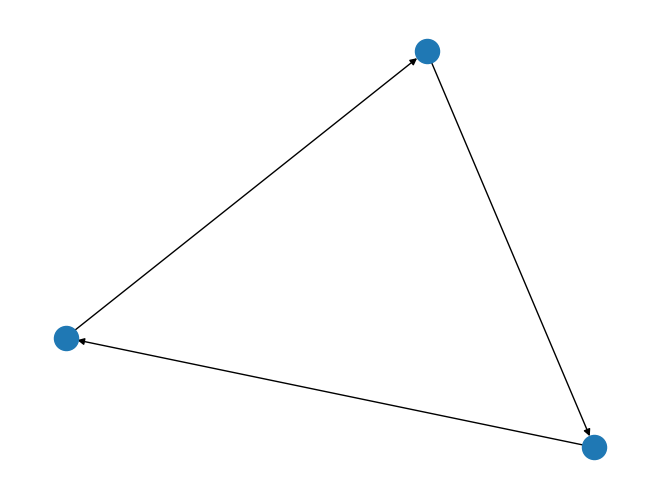

In [12]:
# slow, but it works
# lets test out on Session11
ex1_X = make_C_N(3)
nx.draw(ex1_X)

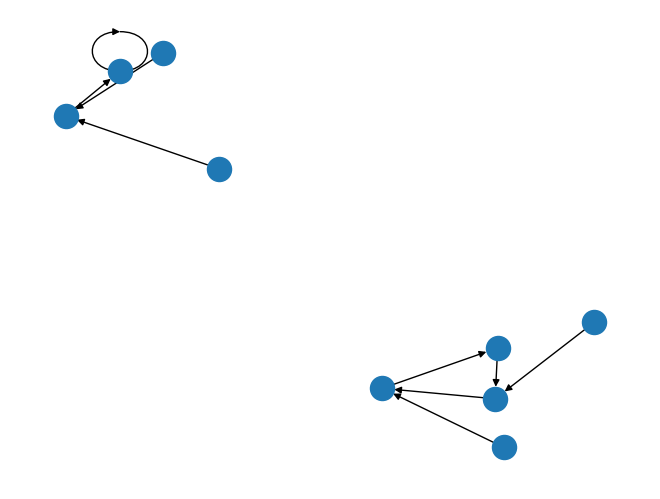

In [13]:
ex1_Y = nx.DiGraph({
    0:[0],
    1:[0],
    2:[1],
    3:[1],
    4:[5],
    5:[6],
    6:[4],
    7:[4],
    8:[5]
})
nx.draw(ex1_Y)

In [14]:
ex1_maps = enumerate_structure_preserving_maps(ex1_X,ex1_Y)

Scanning all 729 maps
Found map! {0: 0, 1: 0, 2: 0}
100/729 ~13.717421124828531%
200/729 ~27.434842249657063%
300/729 ~41.1522633744856%
Found map! {0: 5, 1: 6, 2: 4}
400/729 ~54.869684499314126%
Found map! {0: 6, 1: 4, 2: 5}
500/729 ~68.58710562414267%
Found map! {0: 4, 1: 5, 2: 6}
600/729 ~82.3045267489712%
700/729 ~96.02194787379973%
Found 4 maps all together


In [15]:
ex1_maps

[{0: 0, 1: 0, 2: 0},
 {0: 5, 1: 6, 2: 4},
 {0: 6, 1: 4, 2: 5},
 {0: 4, 1: 5, 2: 6}]

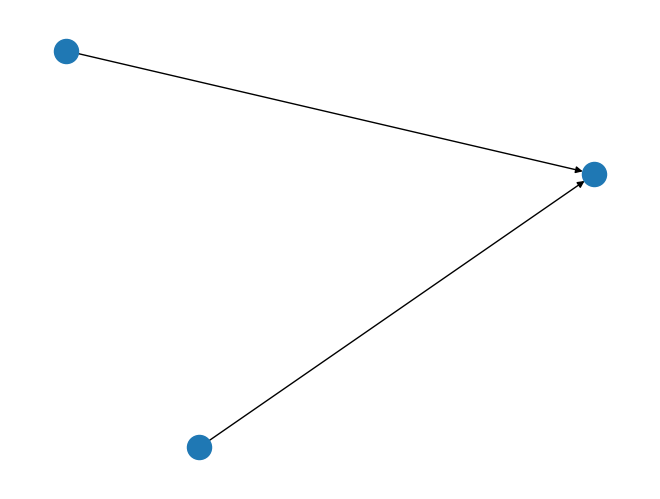

In [16]:
# these are the four maps I expected
# lets try Test 2 Q2 next
q2_X = nx.DiGraph({0:[2],1:[2]})
nx.draw(q2_X)

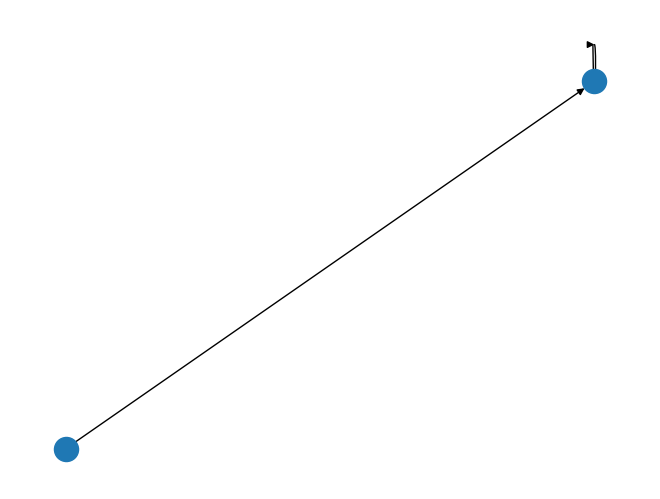

In [17]:
q2_Y = nx.DiGraph({0:[1],1:[1]})
nx.draw(q2_Y)

In [18]:
# expect 4 maps
q2_maps = enumerate_structure_preserving_maps(q2_X,q2_Y)

Scanning all 8 maps
Found map! {0: 0, 1: 0, 2: 1}
Found map! {0: 1, 1: 0, 2: 1}
Found map! {0: 0, 1: 1, 2: 1}
Found map! {0: 1, 1: 1, 2: 1}
Found 4 maps all together


In [19]:
from session15 import get_session15_endomaps
s15_X,s15_Y = get_session15_endomaps()

In [20]:
def factor_graph_into_cycles(G):
    node_count = len(G.nodes)
    terminal_objects = [
        make_C_N(i) for i in range(node_count)
    ]
    maps_by_cycle = []
    i = 0
    while i*i <= node_count:
        maps = enumerate_structure_preserving_maps(terminal_objects[i],G)
        maps_by_cycle.append(maps)
        i += 1
        
    return maps_by_cycle
factor_graph_into_cycles(s15_X)

Scanning all 1 maps
Found map! {}
Found 1 maps all together
Scanning all 9 maps
Found 0 maps all together
Scanning all 81 maps
Found map! {0: 'X8', 1: 'X3'}
Found map! {0: 'X3', 1: 'X8'}
Found 2 maps all together
Scanning all 729 maps
100/729 ~13.717421124828531%
200/729 ~27.434842249657063%
300/729 ~41.1522633744856%
400/729 ~54.869684499314126%
Found map! {0: 'X6', 1: 'X7', 2: 'X5'}
500/729 ~68.58710562414267%
Found map! {0: 'X7', 1: 'X5', 2: 'X6'}
600/729 ~82.3045267489712%
Found map! {0: 'X5', 1: 'X6', 2: 'X7'}
700/729 ~96.02194787379973%
Found 3 maps all together


[[{}],
 [],
 [{0: 'X8', 1: 'X3'}, {0: 'X3', 1: 'X8'}],
 [{0: 'X6', 1: 'X7', 2: 'X5'},
  {0: 'X7', 1: 'X5', 2: 'X6'},
  {0: 'X5', 1: 'X6', 2: 'X7'}]]

In [21]:
factor_graph_into_cycles(s15_Y)

Scanning all 1 maps
Found map! {}
Found 1 maps all together
Scanning all 13 maps
Found 0 maps all together
Scanning all 169 maps
Found map! {0: 'Yl', 1: 'Ym'}
100/169 ~59.171597633136095%
Found map! {0: 'Ym', 1: 'Yl'}
Found 2 maps all together
Scanning all 2197 maps
100/2197 ~4.551661356395084%
200/2197 ~9.103322712790169%
300/2197 ~13.654984069185252%
400/2197 ~18.206645425580337%
500/2197 ~22.75830678197542%
600/2197 ~27.309968138370504%
700/2197 ~31.86162949476559%
800/2197 ~36.413290851160674%
900/2197 ~40.96495220755576%
1000/2197 ~45.51661356395084%
1100/2197 ~50.06827492034593%
1200/2197 ~54.61993627674101%
1300/2197 ~59.171597633136095%
1400/2197 ~63.72325898953118%
1500/2197 ~68.27492034592626%
1600/2197 ~72.82658170232135%
Found map! {0: 'Yx', 1: 'Yy', 2: 'Yw'}
1700/2197 ~77.37824305871644%
1800/2197 ~81.92990441511152%
Found map! {0: 'Yy', 1: 'Yw', 2: 'Yx'}
1900/2197 ~86.4815657715066%
Found map! {0: 'Yw', 1: 'Yx', 2: 'Yy'}
2000/2197 ~91.03322712790168%
2100/2197 ~95.5848884

[[{}],
 [],
 [{0: 'Yl', 1: 'Ym'}, {0: 'Ym', 1: 'Yl'}],
 [{0: 'Yx', 1: 'Yy', 2: 'Yw'},
  {0: 'Yy', 1: 'Yw', 2: 'Yx'},
  {0: 'Yw', 1: 'Yx', 2: 'Yy'}]]

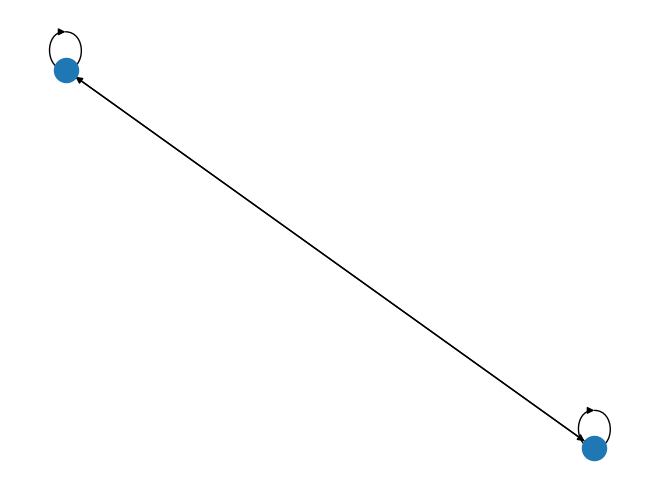

In [22]:
g_2_D = nx.from_numpy_array(np.array([[1,1],[1,1]]),
                            create_using=nx.DiGraph)
nx.draw(g_2_D)


In [23]:
sp_x_2_D = enumerate_structure_preserving_maps(s15_X,g_2_D)

Scanning all 512 maps
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 1, 'X7': 0, 'X0': 0, 'X3': 1, 'X2': 0, 'X1': 0, 'X6': 0}
100/512 ~19.53125%
200/512 ~39.0625%
300/512 ~58.59375%
400/512 ~78.125%
Found map! {'X5': 1, 'X4': 1, 'X8': 0, 'X7': 1, 'X0': 1, 'X3': 0, 'X2': 1, 'X1': 1, 'X6': 1}
500/512 ~97.65625%
Found map! {'X5': 1, 'X4': 1, 'X8': 1, 'X7': 1, 'X0': 1, 'X3': 1, 'X2': 1, 'X1': 1, 'X6': 1}
Found 4 maps all together


In [24]:
def sorts_by_2_D(G):
    sp_maps = enumerate_structure_preserving_maps(G,g_2_D)
    output = []
    for m in sp_maps:
        map_to_0 = list(filter(lambda x: m[x]==0,G.nodes))
        map_to_1 = list(filter(lambda x: m[x]==1,G.nodes))
        output.append((map_to_0,map_to_1))
    return output
sorts_by_2_D(s15_X)

Scanning all 512 maps
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 1, 'X7': 0, 'X0': 0, 'X3': 1, 'X2': 0, 'X1': 0, 'X6': 0}
100/512 ~19.53125%
200/512 ~39.0625%
300/512 ~58.59375%
400/512 ~78.125%
Found map! {'X5': 1, 'X4': 1, 'X8': 0, 'X7': 1, 'X0': 1, 'X3': 0, 'X2': 1, 'X1': 1, 'X6': 1}
500/512 ~97.65625%
Found map! {'X5': 1, 'X4': 1, 'X8': 1, 'X7': 1, 'X0': 1, 'X3': 1, 'X2': 1, 'X1': 1, 'X6': 1}
Found 4 maps all together


[(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []),
 (['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], ['X3', 'X8']),
 (['X3', 'X8'], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7']),
 ([], ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])]

In [25]:
sorts_by_2_D(s15_Y)

Scanning all 8192 maps
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
100/8192 ~1.220703125%
200/8192 ~2.44140625%
300/8192 ~3.662109375%
400/8192 ~4.8828125%
500/8192 ~6.103515625%
Found map! {'Ym': 1, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 1, 'Yv': 0, 'Yz': 0, 'Ys': 0}
600/8192 ~7.32421875%
700/8192 ~8.544921875%
800/8192 ~9.765625%
900/8192 ~10.986328125%
1000/8192 ~12.20703125%
1100/8192 ~13.427734375%
1200/8192 ~14.6484375%
1300/8192 ~15.869140625%
1400/8192 ~17.08984375%
1500/8192 ~18.310546875%
1600/8192 ~19.53125%
1700/8192 ~20.751953125%
1800/8192 ~21.97265625%
1900/8192 ~23.193359375%
2000/8192 ~24.4140625%
2100/8192 ~25.634765625%
2200/8192 ~26.85546875%
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 1, 'Yr': 0, 'Yp': 0, 'Yx': 1, 'Yt': 0, 'Yw': 1, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 1, 'Ys': 0}
2300/8192 ~28.076171875%
2400/8192 ~29.296875%
2500/8192 ~30.517578125%
2600

[(['Yp',
   'Yq',
   'Yr',
   'Ys',
   'Yt',
   'Yv',
   'Yu',
   'Ym',
   'Yl',
   'Yw',
   'Yx',
   'Yy',
   'Yz'],
  []),
 (['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Yw', 'Yx', 'Yy', 'Yz'],
  ['Ym', 'Yl']),
 (['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl'],
  ['Yw', 'Yx', 'Yy', 'Yz']),
 (['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu'],
  ['Ym', 'Yl', 'Yw', 'Yx', 'Yy', 'Yz']),
 (['Ym', 'Yl', 'Yw', 'Yx', 'Yy', 'Yz'],
  ['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu']),
 (['Yw', 'Yx', 'Yy', 'Yz'],
  ['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl']),
 (['Ym', 'Yl'],
  ['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Yw', 'Yx', 'Yy', 'Yz']),
 ([],
  ['Yp',
   'Yq',
   'Yr',
   'Ys',
   'Yt',
   'Yv',
   'Yu',
   'Ym',
   'Yl',
   'Yw',
   'Yx',
   'Yy',
   'Yz'])]

In [26]:
sp_y_2_D = enumerate_structure_preserving_maps(s15_Y,g_2_D)

Scanning all 8192 maps
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
100/8192 ~1.220703125%
200/8192 ~2.44140625%
300/8192 ~3.662109375%
400/8192 ~4.8828125%
500/8192 ~6.103515625%
Found map! {'Ym': 1, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 1, 'Yv': 0, 'Yz': 0, 'Ys': 0}
600/8192 ~7.32421875%
700/8192 ~8.544921875%
800/8192 ~9.765625%
900/8192 ~10.986328125%
1000/8192 ~12.20703125%
1100/8192 ~13.427734375%
1200/8192 ~14.6484375%
1300/8192 ~15.869140625%
1400/8192 ~17.08984375%
1500/8192 ~18.310546875%
1600/8192 ~19.53125%
1700/8192 ~20.751953125%
1800/8192 ~21.97265625%
1900/8192 ~23.193359375%
2000/8192 ~24.4140625%
2100/8192 ~25.634765625%
2200/8192 ~26.85546875%
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 1, 'Yr': 0, 'Yp': 0, 'Yx': 1, 'Yt': 0, 'Yw': 1, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 1, 'Ys': 0}
2300/8192 ~28.076171875%
2400/8192 ~29.296875%
2500/8192 ~30.517578125%
2600

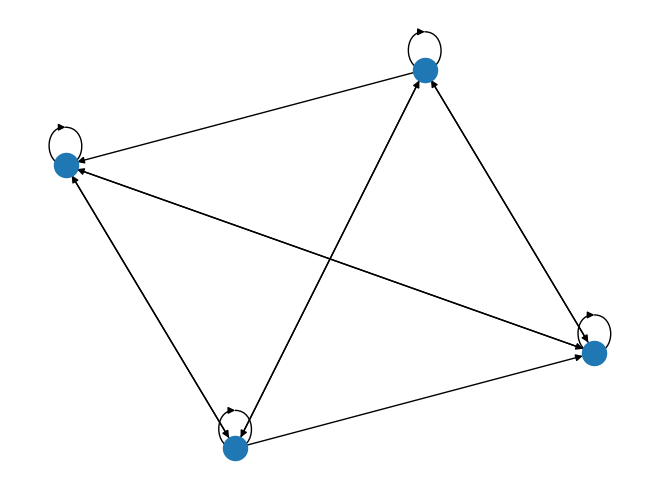

In [27]:
g_2_A = nx.from_numpy_array(np.array([[1,0,1,1],[1,1,1,1],[1,1,1,0],[1,1,1,1]]),
                            create_using=nx.DiGraph)
nx.draw(g_2_A)

In [28]:
sp_x_2_A = enumerate_structure_preserving_maps(s15_X,g_2_A)
print(sp_x_2_A,len(sp_x_2_A))

Scanning all 262144 maps
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 1, 'X7': 0, 'X0': 0, 'X3': 1, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 2, 'X7': 0, 'X0': 0, 'X3': 2, 'X2': 0, 'X1': 0, 'X6': 0}
2621/262144 ~0.9998321533203125%
Found map! {'X5': 0, 'X4': 0, 'X8': 3, 'X7': 0, 'X0': 0, 'X3': 3, 'X2': 0, 'X1': 0, 'X6': 0}
5242/262144 ~1.999664306640625%
7863/262144 ~2.9994964599609375%
10484/262144 ~3.99932861328125%
13105/262144 ~4.9991607666015625%
15726/262144 ~5.998992919921875%
18347/262144 ~6.9988250732421875%
20968/262144 ~7.9986572265625%
23589/262144 ~8.998489379882812%
26210/262144 ~9.998321533203125%
28831/262144 ~10.998153686523438%
31452/262144 ~11.99798583984375%
34073/262144 ~12.997817993164062%
36694/262144 ~13.997650146484375%
39315/262144 ~14.997482299804688%
41936/262144 ~15.997314453125%
44557/262144 ~16.997146606445312%
47178/262144 ~17.996978759765625%
49799/2

In [29]:
def sorts_by_2_A(G):
    sp_maps = enumerate_structure_preserving_maps(G,g_2_A)
    output = []
    for m in sp_maps:
        maps = [list(filter(lambda x: m[x]==i,G.nodes)) for \
                i in range(4)]
        output.append(maps)
    return output
sorts_by_2_A(s15_X)

Scanning all 262144 maps
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 1, 'X7': 0, 'X0': 0, 'X3': 1, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 2, 'X7': 0, 'X0': 0, 'X3': 2, 'X2': 0, 'X1': 0, 'X6': 0}
2621/262144 ~0.9998321533203125%
Found map! {'X5': 0, 'X4': 0, 'X8': 3, 'X7': 0, 'X0': 0, 'X3': 3, 'X2': 0, 'X1': 0, 'X6': 0}
5242/262144 ~1.999664306640625%
7863/262144 ~2.9994964599609375%
10484/262144 ~3.99932861328125%
13105/262144 ~4.9991607666015625%
15726/262144 ~5.998992919921875%
18347/262144 ~6.9988250732421875%
20968/262144 ~7.9986572265625%
23589/262144 ~8.998489379882812%
26210/262144 ~9.998321533203125%
28831/262144 ~10.998153686523438%
31452/262144 ~11.99798583984375%
34073/262144 ~12.997817993164062%
36694/262144 ~13.997650146484375%
39315/262144 ~14.997482299804688%
41936/262144 ~15.997314453125%
44557/262144 ~16.997146606445312%
47178/262144 ~17.996978759765625%
49799/2

[[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], [], [], []],
 [['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], ['X3', 'X8'], [], []],
 [['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], [], ['X3', 'X8'], []],
 [['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], [], [], ['X3', 'X8']],
 [['X3', 'X8'], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], [], []],
 [[], ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], [], []],
 [[], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], ['X3', 'X8'], []],
 [[], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], [], ['X3', 'X8']],
 [['X3', 'X8'], [], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], []],
 [[], ['X3', 'X8'], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], []],
 [[], [], ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [[], [], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7'], ['X3', 'X8']],
 [['X3', 'X8'], [], [], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7']],
 [[], ['X3', 'X8'], [], ['X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X7']],
 [[], [], ['X3', 'X8'], ['X0

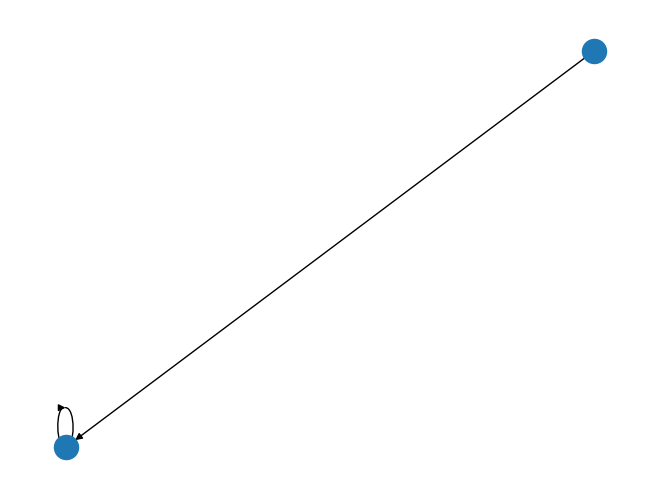

In [30]:
g_2_A = nx.from_numpy_array(np.array([[1,0],[1,0]]),
                            create_using=nx.DiGraph)
nx.draw(g_2_A)

In [31]:
def sorts_by_2_A(G):
    sp_maps = enumerate_structure_preserving_maps(G,g_2_A)
    output = []
    for m in sp_maps:
        maps = [list(filter(lambda x: m[x]==i,G.nodes)) for \
                i in range(2)]
        output.append(maps)
    return output
sorts_by_2_A(s15_X)

Scanning all 512 maps
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 1, 'X3': 0, 'X2': 0, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 1, 'X1': 0, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 1, 'X3': 0, 'X2': 1, 'X1': 0, 'X6': 0}
100/512 ~19.53125%
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 0, 'X1': 1, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 1, 'X3': 0, 'X2': 0, 'X1': 1, 'X6': 0}
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 0, 'X3': 0, 'X2': 1, 'X1': 1, 'X6': 0}
200/512 ~39.0625%
Found map! {'X5': 0, 'X4': 0, 'X8': 0, 'X7': 0, 'X0': 1, 'X3': 0, 'X2': 1, 'X1': 1, 'X6': 0}
300/512 ~58.59375%
400/512 ~78.125%
500/512 ~97.65625%
Found 8 maps all together


[[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0']],
 [['X0', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X2']],
 [['X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X2']],
 [['X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1']],
 [['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X1']],
 [['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X2']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X1', 'X2']]]

In [32]:
sorts_by_2_A(s15_Y)

Scanning all 8192 maps
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 1, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 0, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
100/8192 ~1.220703125%
200/8192 ~2.44140625%
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 0, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 1, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
Found map! {'Ym': 0, 'Yu': 0, 'Yy': 0, 'Yr': 0, 'Yp': 1, 'Yx': 0, 'Yt': 0, 'Yw': 0, 'Yq': 1, 'Yl': 0, 'Yv': 0, 'Yz': 0, 'Ys': 0}
300/8192 ~3.662109375%
400/8192 ~4.8828125%
500/8192 ~6.103515625%
600/8192 ~7.32421875%
700/8192 ~8.544921875%
800/8192 ~9.765625%
900/8192 ~10.986328125%
1000/8192 ~12.20703125%
1100/8192 ~13.427734375%
1200/8192 ~14.6484375%
1300/8192 ~15.869140625%
1400/8192 ~17.08984375%
1500/8192 ~18.310546875%
1600/8192 ~19.53125%
1700/8192 ~20.751953125%
1800/8192 ~21.97265625%
1900/8192 ~23.193359375%
2000/8192 ~24.41406

[[['Yp',
   'Yq',
   'Yr',
   'Ys',
   'Yt',
   'Yv',
   'Yu',
   'Ym',
   'Yl',
   'Yw',
   'Yx',
   'Yy',
   'Yz'],
  []],
 [['Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy', 'Yz'],
  ['Yp']],
 [['Yp', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy', 'Yz'],
  ['Yq']],
 [['Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy', 'Yz'],
  ['Yp', 'Yq']],
 [['Yp', 'Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy'],
  ['Yz']],
 [['Yq', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy'],
  ['Yp', 'Yz']],
 [['Yp', 'Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy'],
  ['Yq', 'Yz']],
 [['Yr', 'Ys', 'Yt', 'Yv', 'Yu', 'Ym', 'Yl', 'Yw', 'Yx', 'Yy'],
  ['Yp', 'Yq', 'Yz']]]

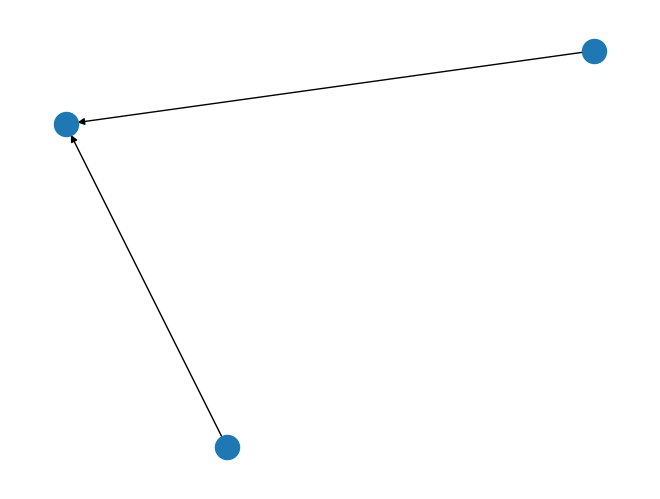

In [33]:
generic_product = nx.DiGraph({1:[0],2:[0]})
nx.draw(generic_product)

In [34]:
s15_x_to_prod = enumerate_structure_preserving_maps(s15_X,generic_product)
print(s15_x_to_prod,len(s15_x_to_prod))

Scanning all 19683 maps
196/19683 ~0.9957831631357008%
392/19683 ~1.9915663262714016%
588/19683 ~2.9873494894071024%
784/19683 ~3.9831326525428032%
980/19683 ~4.978915815678504%
1176/19683 ~5.974698978814205%
1372/19683 ~6.970482141949906%
1568/19683 ~7.9662653050856065%
1764/19683 ~8.962048468221308%
1960/19683 ~9.957831631357008%
2156/19683 ~10.95361479449271%
2352/19683 ~11.94939795762841%
2548/19683 ~12.945181120764111%
2744/19683 ~13.940964283899811%
2940/19683 ~14.936747447035513%
3136/19683 ~15.932530610171213%
3332/19683 ~16.928313773306915%
3528/19683 ~17.924096936442616%
3724/19683 ~18.919880099578318%
3920/19683 ~19.915663262714016%
4116/19683 ~20.911446425849718%
4312/19683 ~21.90722958898542%
4508/19683 ~22.90301275212112%
4704/19683 ~23.89879591525682%
4900/19683 ~24.89457907839252%
5096/19683 ~25.890362241528223%
5292/19683 ~26.886145404663925%
5488/19683 ~27.881928567799623%
5684/19683 ~28.877711730935324%
5880/19683 ~29.873494894071026%
6076/19683 ~30.869278057206728%


In [35]:
def sorts_by_product(G):
    sp_maps = enumerate_structure_preserving_maps(G,generic_product)
    output = []
    for m in sp_maps:
        maps = [list(filter(lambda x: m[x]==i,G.nodes)) for \
                i in range(2)]
        output.append(maps)
    return output
sorts_by_product(s15_X)

Scanning all 19683 maps
196/19683 ~0.9957831631357008%
392/19683 ~1.9915663262714016%
588/19683 ~2.9873494894071024%
784/19683 ~3.9831326525428032%
980/19683 ~4.978915815678504%
1176/19683 ~5.974698978814205%
1372/19683 ~6.970482141949906%
1568/19683 ~7.9662653050856065%
1764/19683 ~8.962048468221308%
1960/19683 ~9.957831631357008%
2156/19683 ~10.95361479449271%
2352/19683 ~11.94939795762841%
2548/19683 ~12.945181120764111%
2744/19683 ~13.940964283899811%
2940/19683 ~14.936747447035513%
3136/19683 ~15.932530610171213%
3332/19683 ~16.928313773306915%
3528/19683 ~17.924096936442616%
3724/19683 ~18.919880099578318%
3920/19683 ~19.915663262714016%
4116/19683 ~20.911446425849718%
4312/19683 ~21.90722958898542%
4508/19683 ~22.90301275212112%
4704/19683 ~23.89879591525682%
4900/19683 ~24.89457907839252%
5096/19683 ~25.890362241528223%
5292/19683 ~26.886145404663925%
5488/19683 ~27.881928567799623%
5684/19683 ~28.877711730935324%
5880/19683 ~29.873494894071026%
6076/19683 ~30.869278057206728%


[[['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X1', 'X2']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X2']],
 [['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1', 'X2']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X1']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1']],
 [['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1']],
 [['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X1']],
 [['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1']],
 [['X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X1']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0', 'X2']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X2']],
 [['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X2']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0']],
 [['X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], ['X0']],
 [['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [['X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], []],
 [['X1', 'X3', 'X4',

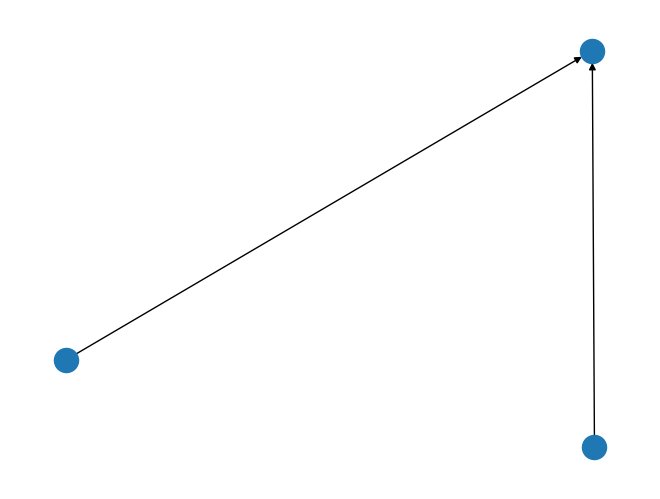

In [36]:
generic_sum = nx.DiGraph({0:[2],1:[2]})
nx.draw(generic_sum)

In [37]:
s15_x_to_sum = enumerate_structure_preserving_maps(s15_X,generic_sum)
print(s15_x_to_sum,len(s15_x_to_sum))

Scanning all 19683 maps
196/19683 ~0.9957831631357008%
392/19683 ~1.9915663262714016%
588/19683 ~2.9873494894071024%
784/19683 ~3.9831326525428032%
980/19683 ~4.978915815678504%
1176/19683 ~5.974698978814205%
1372/19683 ~6.970482141949906%
1568/19683 ~7.9662653050856065%
1764/19683 ~8.962048468221308%
1960/19683 ~9.957831631357008%
2156/19683 ~10.95361479449271%
2352/19683 ~11.94939795762841%
2548/19683 ~12.945181120764111%
2744/19683 ~13.940964283899811%
2940/19683 ~14.936747447035513%
3136/19683 ~15.932530610171213%
3332/19683 ~16.928313773306915%
3528/19683 ~17.924096936442616%
3724/19683 ~18.919880099578318%
3920/19683 ~19.915663262714016%
4116/19683 ~20.911446425849718%
4312/19683 ~21.90722958898542%
4508/19683 ~22.90301275212112%
4704/19683 ~23.89879591525682%
4900/19683 ~24.89457907839252%
5096/19683 ~25.890362241528223%
5292/19683 ~26.886145404663925%
5488/19683 ~27.881928567799623%
5684/19683 ~28.877711730935324%
5880/19683 ~29.873494894071026%
6076/19683 ~30.869278057206728%


In [38]:
def sorts_by_sum(G):
    sp_maps = enumerate_structure_preserving_maps(G,generic_sum)
    output = []
    for m in sp_maps:
        maps = [list(filter(lambda x: m[x]==i,G.nodes)) for \
                i in range(3)]
        output.append(maps)
    return output
sorts_by_sum(s15_X)

Scanning all 19683 maps
196/19683 ~0.9957831631357008%
392/19683 ~1.9915663262714016%
588/19683 ~2.9873494894071024%
784/19683 ~3.9831326525428032%
980/19683 ~4.978915815678504%
1176/19683 ~5.974698978814205%
1372/19683 ~6.970482141949906%
1568/19683 ~7.9662653050856065%
1764/19683 ~8.962048468221308%
1960/19683 ~9.957831631357008%
2156/19683 ~10.95361479449271%
2352/19683 ~11.94939795762841%
2548/19683 ~12.945181120764111%
2744/19683 ~13.940964283899811%
2940/19683 ~14.936747447035513%
3136/19683 ~15.932530610171213%
3332/19683 ~16.928313773306915%
3528/19683 ~17.924096936442616%
3724/19683 ~18.919880099578318%
3920/19683 ~19.915663262714016%
4116/19683 ~20.911446425849718%
4312/19683 ~21.90722958898542%
4508/19683 ~22.90301275212112%
4704/19683 ~23.89879591525682%
4900/19683 ~24.89457907839252%
5096/19683 ~25.890362241528223%
5292/19683 ~26.886145404663925%
5488/19683 ~27.881928567799623%
5684/19683 ~28.877711730935324%
5880/19683 ~29.873494894071026%
6076/19683 ~30.869278057206728%


[[['X0', 'X1', 'X2'], [], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1', 'X2'], ['X0'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1', 'X2'], [], ['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X0', 'X1'], ['X2'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1'], ['X0', 'X2'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1'], ['X2'], ['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X0', 'X1'], [], ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1'], ['X0'], ['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X1'], [], ['X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X0', 'X2'], ['X1'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X2'], ['X0', 'X1'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X2'], ['X1'], ['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X0'], ['X1', 'X2'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [[], ['X0', 'X1', 'X2'], ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [[], ['X1', 'X2'], ['X0', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']],
 [['X0'], ['X1'], ['X2', 'X3', 'X4', 'X5', 

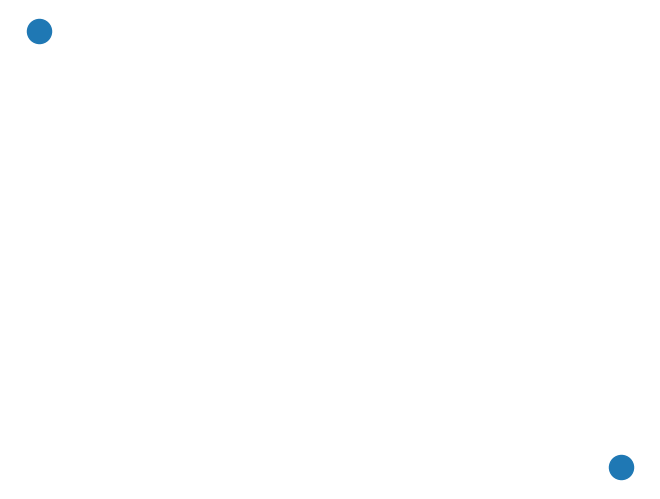

In [39]:
from graphs import graph_sum, graph_product, NAKED_DOT, NAKED_ARROW, EMPTY_GRAPH
nx.draw(graph_sum(NAKED_DOT,NAKED_DOT))

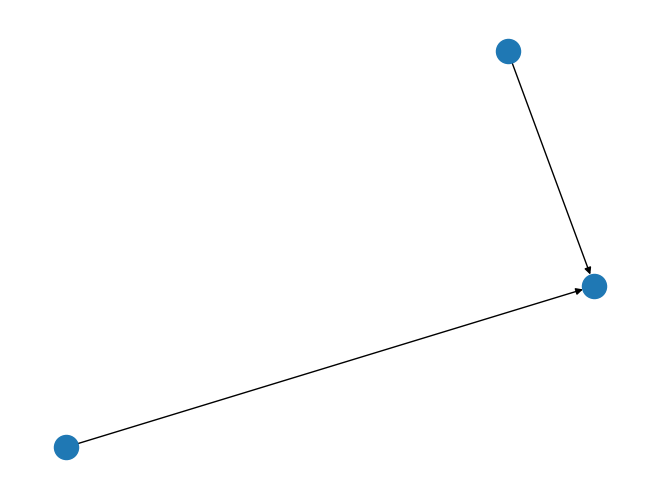

In [40]:
# property of a coproduct
nx.draw(generic_sum)

In [41]:
enumerate_structure_preserving_maps(generic_sum,graph_sum(NAKED_DOT,NAKED_DOT))

Scanning all 8 maps
Found map! {0: 0, 1: 0, 2: 0}
Found map! {0: 1, 1: 1, 2: 1}
Found 2 maps all together


[{0: 0, 1: 0, 2: 0}, {0: 1, 1: 1, 2: 1}]

In [42]:
enumerate_structure_preserving_maps(generic_sum,g_2_D)

Scanning all 8 maps
Found map! {0: 0, 1: 0, 2: 0}
Found map! {0: 1, 1: 1, 2: 1}
Found 2 maps all together


[{0: 0, 1: 0, 2: 0}, {0: 1, 1: 1, 2: 1}]

In [43]:
enumerate_structure_preserving_maps(generic_sum,g_2_A)

Scanning all 8 maps
Found map! {0: 0, 1: 0, 2: 0}
Found map! {0: 1, 1: 0, 2: 0}
Found map! {0: 0, 1: 1, 2: 0}
Found map! {0: 1, 1: 1, 2: 0}
Found 4 maps all together


[{0: 0, 1: 0, 2: 0},
 {0: 1, 1: 0, 2: 0},
 {0: 0, 1: 1, 2: 0},
 {0: 1, 1: 1, 2: 0}]

In [44]:
d = nx.coloring.greedy_color(s15_X, strategy="largest_first")

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

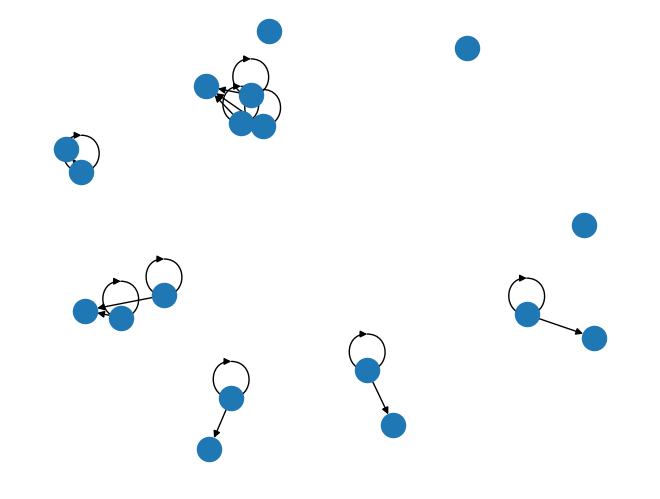

In [45]:
def endomap_to_graph_space(G):
    M = nx.to_numpy_array(G)
    id = np.eye(M.shape[0])
    zeros = np.full((M.shape[0],M.shape[0]),0)
    LM = np.vstack([id,zeros])
    RM = np.vstack([M,zeros])
    new_M = np.hstack([LM,RM])
    print(new_M,new_M.shape)
    return nx.from_numpy_array(new_M,create_using=nx.DiGraph)
nx.draw(endomap_to_graph_space(s15_X))

[]


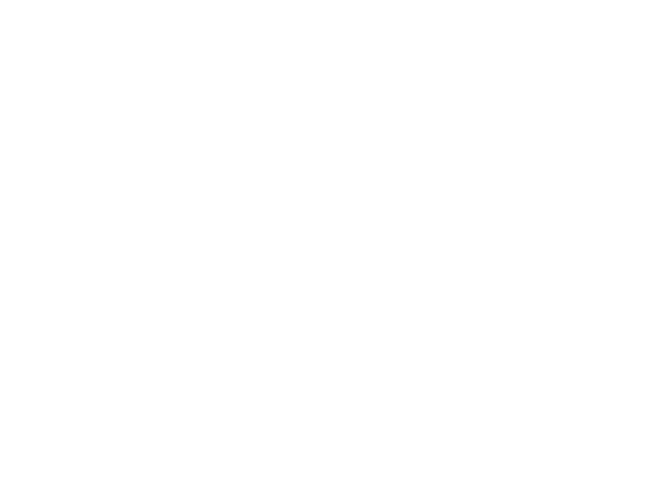

In [46]:
def print_mat_and_draw(G):
    print(nx.to_numpy_array(G))
    nx.draw(G)
print_mat_and_draw(EMPTY_GRAPH)

[[0.]]


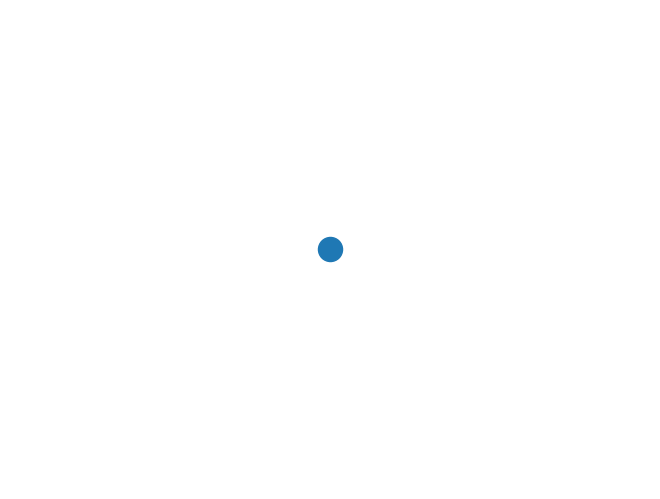

In [47]:
print_mat_and_draw(NAKED_DOT)

[[0. 1.]
 [0. 0.]]


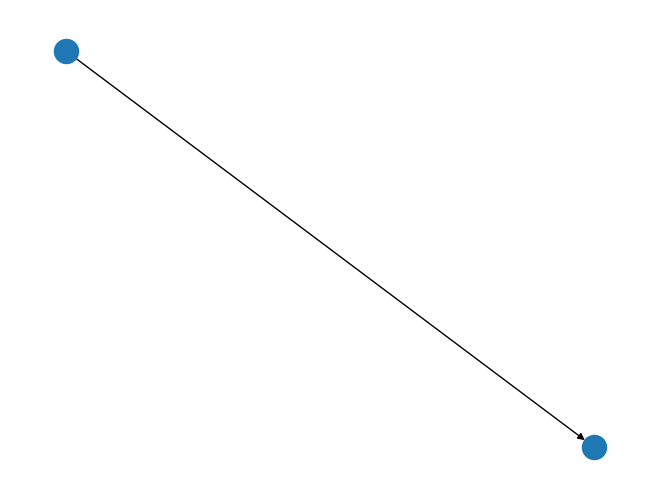

In [48]:
print_mat_and_draw(NAKED_ARROW)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


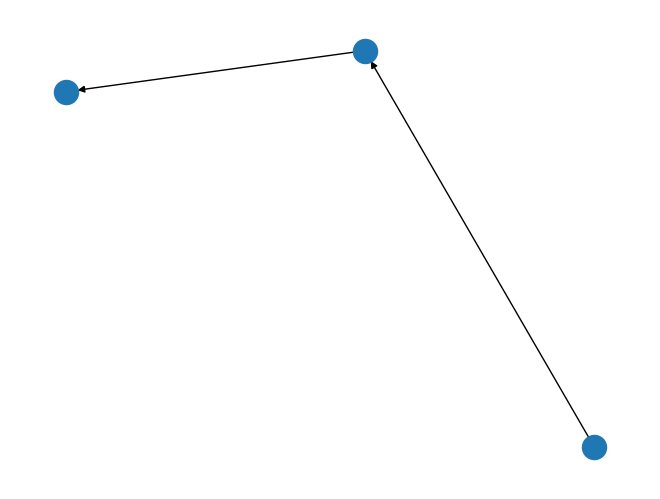

In [49]:
print_mat_and_draw(make_A_N(2))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


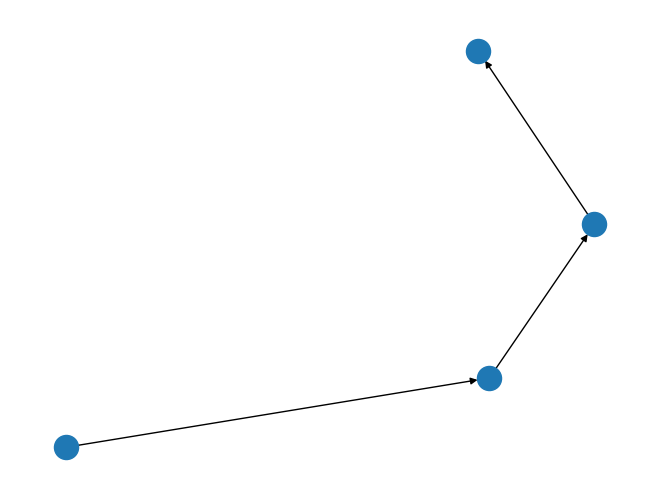

In [50]:
print_mat_and_draw(make_A_N(3))

In [51]:
nx.greedy_color(s15_X)

{'X5': 0,
 'X6': 0,
 'X3': 0,
 'X4': 1,
 'X7': 1,
 'X8': 1,
 'X0': 0,
 'X1': 1,
 'X2': 1}

In [52]:
nx.greedy_color(s15_Y)

{'Yr': 0,
 'Yt': 0,
 'Yy': 0,
 'Ys': 1,
 'Yv': 0,
 'Yu': 0,
 'Ym': 0,
 'Yl': 1,
 'Yw': 0,
 'Yx': 1,
 'Yp': 1,
 'Yq': 1,
 'Yz': 1}

In [53]:
nx.greedy_color(endomap_to_graph_space(s15_X))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 14: 0,
 15: 0,
 12: 0,
 13: 0,
 16: 0,
 17: 0,
 9: 0,
 10: 0,
 11: 0}

In [54]:
enumerate_structure_preserving_maps(s15_X,make_C_N(2))

Scanning all 512 maps
100/512 ~19.53125%
200/512 ~39.0625%
300/512 ~58.59375%
400/512 ~78.125%
500/512 ~97.65625%
Found 0 maps all together


[]

In [55]:
enumerate_structure_preserving_maps(endomap_to_graph_space(s15_X),make_C_N(2))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[]

In [56]:
follow_endomap(s15_X,"X1")

'X5'

In [57]:
def valid_tricoloring(G,M):
    color_set = set(range(3))
    for n in G.nodes:
        if n not in M or M[n] not in color_set:
            return False
        succs = list(G.successors(n))
        for s in succs:
            if M[n]==M[s]:
                print(f"Node {n} links to {s} and both are color {M[n]}")
                return False
    return True

        

In [58]:
valid_tricoloring(s15_X,nx.greedy_color(s15_X))

Node X5 links to X6 and both are color 0


False

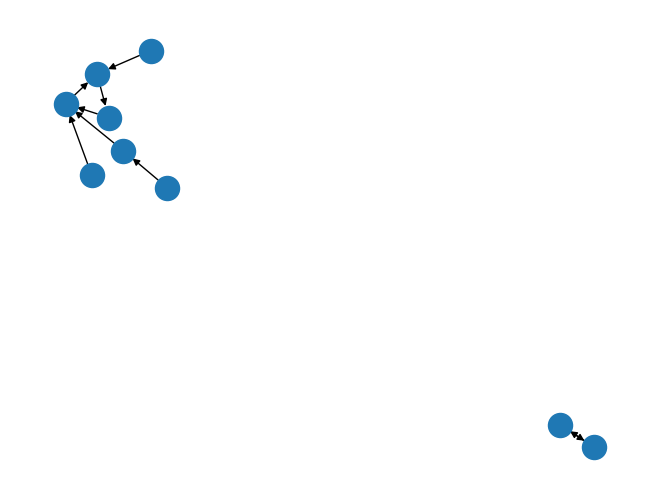

In [59]:
nx.draw(s15_X)

In [60]:
follow_endomap(s15_X,"X4")

'X5'

In [61]:
s15_X.edges

OutEdgeView([('X0', 'X4'), ('X1', 'X5'), ('X2', 'X6'), ('X3', 'X8'), ('X4', 'X5'), ('X5', 'X6'), ('X6', 'X7'), ('X7', 'X5'), ('X8', 'X3')])

In [62]:
test_coloring = {
    # start with the bigest chain
    "X0":0,
    "X4":1,
    "X5":2,
    "X6":0,
    "X7":1, 
    #x7 links to x5 so those are fine

    # X1 links to X5 also, so pair it up with X4's color
    "X1":1,
    
    # X2 links to X6 also, so pair it up with X5's color
    "X2":2,

    # X3 and X8 link to each other, so it doesn't matter how we pair
    # as long as they're different
    "X3":0,
    "X8":1
}

In [63]:
valid_tricoloring(s15_X,test_coloring)

True

In [64]:
from presentations import make_presentation
# i think i can do this algorithmically with the presentation


In [65]:
def generate_tricoloring(G):
    P = make_presentation(G)
    coloring = {}
    for r in P['relations']:
        if r[0][0]==r[1][0]:
            #loop
            coloring[r[0][0]] = 0
            next_color = 1
            next_element = follow_endomap(G,r[0][0])
            loop_size = max(r[0][1],r[1][1])-min(r[0][1],r[1][1])
            even_loop = (loop_size % 2) == 0
            while next_element not in coloring:
                coloring[next_element] = next_color
                if even_loop:
                    next_color = (next_color+1)%2
                else:
                    next_color = (next_color+1)%3
                next_element = follow_endomap(G,next_element)
        else:
            # make sure we're "optimal"
            assert r[1][0] in coloring and r[0][0] not in coloring
            left_color = (coloring[r[1][0]]+r[1][1])%3
            right_offset = (r[0][1]%3)
            next_color = (left_color-right_offset+3)%3
            coloring[r[0][0]] = next_color
            next_element = follow_endomap(G,r[0][0])
            while next_element not in coloring:
                next_color = (next_color+1)%3
                next_element = follow_endomap(G,next_element)
    return coloring

generate_tricoloring(s15_X)

{'X0': 0,
 'X4': 1,
 'X5': 2,
 'X6': 0,
 'X7': 1,
 'X1': 1,
 'X2': 2,
 'X3': 0,
 'X8': 1}

In [66]:
valid_tricoloring(s15_X,generate_tricoloring(s15_X))

True

In [67]:
Y_colors = generate_tricoloring(s15_Y)
print(Y_colors)

{'Yp': 0, 'Yr': 1, 'Yt': 0, 'Yv': 1, 'Yu': 0, 'Ys': 1, 'Yq': 0, 'Yz': 0, 'Yy': 1, 'Yw': 2, 'Yx': 0, 'Ym': 0, 'Yl': 1}


In [68]:
valid_tricoloring(s15_Y,Y_colors)

True

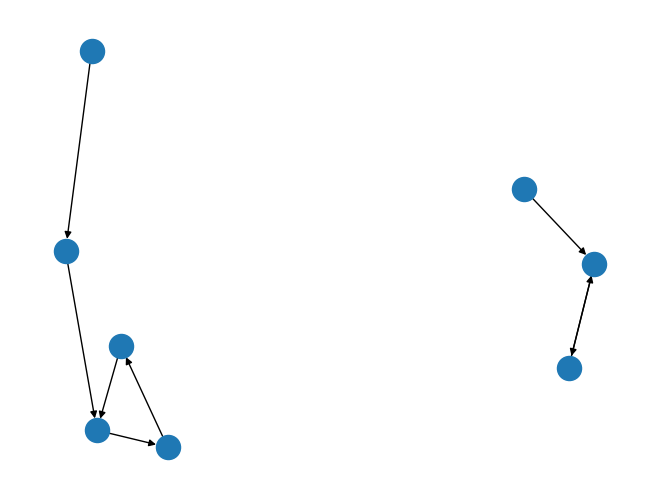

In [69]:
F = nx.DiGraph({
    0:[1],
    1:[2],
    2:[1],
    3:[4],
    4:[5],
    5:[6],
    6:[7],
    7:[5]
})
nx.draw(F)

In [70]:
generate_tricoloring(F)

{0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 2, 6: 0, 7: 1}

In [71]:
valid_tricoloring(F,generate_tricoloring(F))

True

In [72]:
s15_X_pres = make_presentation(s15_X)

In [73]:
from numbertheory import make_one_hot

In [74]:
def make_relation_matrix(pres):
    gen_count = len(pres['generators'])
    rev_gen = {v:k for k,v in zip(range(gen_count),pres['generators'])}
    size = gen_count+1
    rows = [np.full((size,),0)]
    self_ref = np.array(make_one_hot(size,0))
    print(self_ref)
    for r in pres['relations']:
        if r[0][0]==r[1][0]:
            print(f"Loop {r}")
            unit_vec = np.array(make_one_hot(size,rev_gen[r[0][0]]+1))
            max_val = max(r[0][1],r[1][1])
            min_val = min(r[0][1],r[1][1])
            
            rows.append(max_val*self_ref+min_val*unit_vec)
            print(rows)
        else:
            print(f"Tail {r}")
            s_vec = np.array([
                r[0][1] if i == rev_gen[r[0][0]]+1 else \
                r[1][1] if i == rev_gen[r[1][0]]+1 else 0 for i in range(size)])
            print(s_vec)
            rows.append(s_vec)
            print(rows)
    print(rows)
    return np.vstack(rows)
        
make_relation_matrix(s15_X_pres)



[1 0 0 0 0]
Loop (('X0', 5), ('X0', 2))
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0])]
Tail (('X1', 1), ('X0', 2))
[0 2 1 0 0]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0])]
Tail (('X2', 1), ('X0', 3))
[0 3 0 1 0]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0])]
Loop (('X3', 2), ('X3', 0))
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0]), array([2, 0, 0, 0, 0])]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0]), array([2, 0, 0, 0, 0])]


array([[0, 0, 0, 0, 0],
       [5, 2, 0, 0, 0],
       [0, 2, 1, 0, 0],
       [0, 3, 0, 1, 0],
       [2, 0, 0, 0, 0]])

In [75]:
rel_graph = nx.from_numpy_array(make_relation_matrix(s15_X_pres),create_using=nx.DiGraph)

[1 0 0 0 0]
Loop (('X0', 5), ('X0', 2))
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0])]
Tail (('X1', 1), ('X0', 2))
[0 2 1 0 0]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0])]
Tail (('X2', 1), ('X0', 3))
[0 3 0 1 0]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0])]
Loop (('X3', 2), ('X3', 0))
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0]), array([2, 0, 0, 0, 0])]
[array([0, 0, 0, 0, 0]), array([5, 2, 0, 0, 0]), array([0, 2, 1, 0, 0]), array([0, 3, 0, 1, 0]), array([2, 0, 0, 0, 0])]


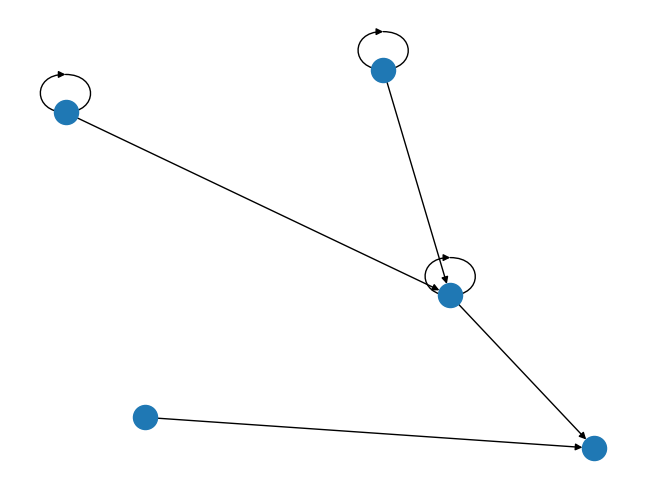

In [76]:
nx.draw(rel_graph)

In [77]:
np.linalg.svd(nx.to_numpy_array(rel_graph))

SVDResult(U=array([[ 1.11022302e-16,  5.55111512e-17, -3.09244860e-17,
         7.32920669e-17, -1.00000000e+00],
       [-9.02989183e-01,  2.31639588e-01, -8.83836396e-17,
         3.61875166e-01,  1.11022302e-16],
       [-1.74015115e-01, -5.16394349e-01,  8.32050294e-01,
        -1.03672194e-01, -2.22044605e-16],
       [-2.61022672e-01, -7.74591523e-01, -5.54700196e-01,
        -1.55508291e-01,  0.00000000e+00],
       [-2.93592300e-01,  2.82290541e-01,  2.20959099e-16,
        -9.13299300e-01, -5.55111512e-17]]), S=array([5.89547021, 3.49366792, 1.        , 0.19420478, 0.        ]), Vh=array([[-0.86543233, -0.49819209, -0.02951675, -0.04427512, -0.        ],
       [ 0.4931147 , -0.82815086, -0.14780865, -0.22171298, -0.        ],
       [-0.        , -0.        ,  0.83205029, -0.5547002 , -0.        ],
       [-0.08868355,  0.25684781, -0.53382925, -0.80074388,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]]))